<a href="https://colab.research.google.com/github/bingsen-wang/Python-Examples/blob/main/Prime_Numbers_in_Polar_coordinates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Python Example: Prime Numbers Plotted in Polar Coordinates
</h1></b>

Dr. Bingsen Wang

12/17/2023
</center>

#Python Code
The Python code plots the prime numbers in polar coodinates.

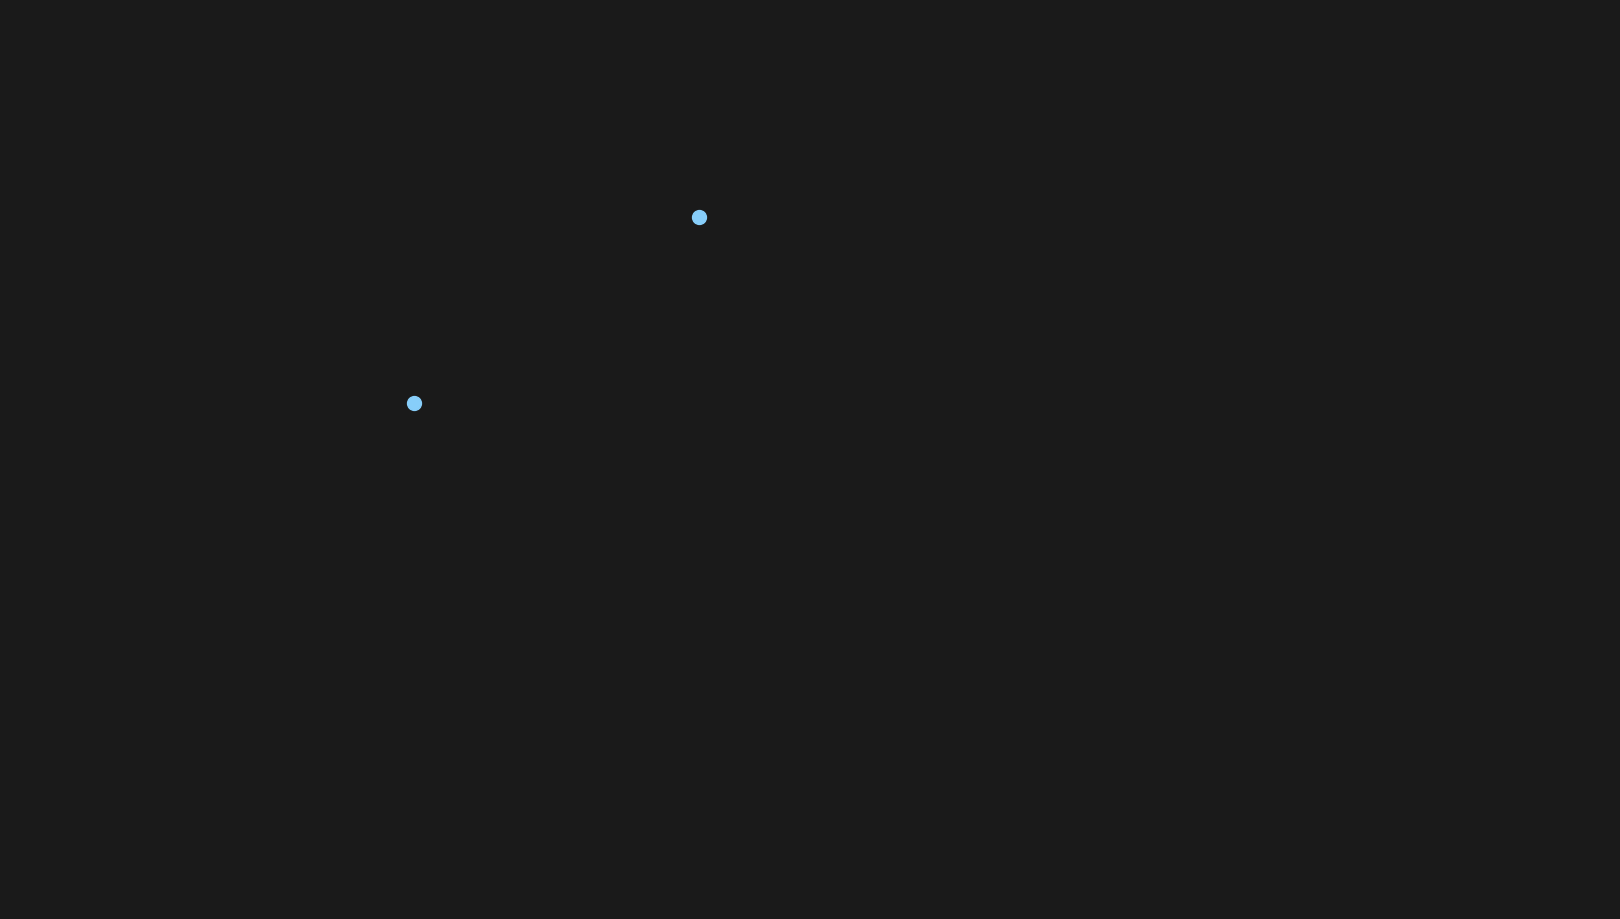

In [78]:
from os import linesep
from numpy import linspace,pi,exp,array
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

#parameters
clst=['lightskyblue','violet','yellow','w',(.1,.1,.1)] #colors dark bg
Nf = 250
Nfi = linspace(0,1,Nf) #used to set the xy limit in each frame
mksz = linspace(10,1,Nf) #used to change markersize from 10 to 1 in each frame
n_lst = [2,3]
nn = 17
for k in range(1,2**nn):
  for n in n_lst:
    if (6*k-1)%n == 0:
      break;
  else: # execute when loop didn't break
    n_lst.append(6*k-1)

  for n in n_lst:
    if (6*k+1)%n == 0:
      break;
  else: # execute when loop doesn't break
    n_lst.append(6*k+1)

fig = plt.figure(figsize=(16,9),facecolor=clst[-1])
fig.tight_layout()
line_lst = [] #array containing all the line segments
ax=fig.add_axes([0,0,1,1],fc='none') #no face color
ax.axis('off') #turn off axis frames
line = ax.plot([], [],color=clst[0],ls='',marker='o',markersize=1)[0]
x = array(n_lst)*exp(1j*array(n_lst))
# animation function. This is called sequentially
def animate(i):
  ax.set_xlim(-2**(Nfi[i]*nn)*6,2**(Nfi[i]*nn)*6)
  ax.set_ylim(-2**(Nfi[i]*nn)*6*9/16,2**(Nfi[i]*nn)*6*9/16)
  line.set_markersize(mksz[i])
  line.set_data(x.real,x.imag)
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = "numbersInPolar.mp4"
writervideo = animation.FFMpegWriter(fps=25)
anim.save(fn, writer=writervideo,dpi = 120)
